# Control Charts

In [1]:
import pyspc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the data

In [2]:
df = pd.read_csv('ControlChartData.csv')
pickTimes = df.tPickTime
comment = df.Comments

## Store the data into arrays, find the difference of the times for the I-MR chart 

In [3]:
sampleNum = []

for y in range (1, (np.size(pickTimes))):
    sampleNum.append(y)

def calcDiff():
    difference = []
    for x in range (0,(np.size(pickTimes)-1)):
        difference.append(np.abs(pickTimes[x]-pickTimes[x+1]))
    return difference

difference = calcDiff()

In [4]:
coordinates = zip(sampleNum, difference)

## Find LCL and UCL 

In [5]:
center = np.mean(difference)
d2 = 1.128
wl = 0.044319
wu = 3.169822
sd = center/d2
lcl = sd*wl
ucl = sd*wu

In [6]:
print(lcl)
print(ucl)

0.0250092333773996
1.7887321050297966


## I-MR Chart 

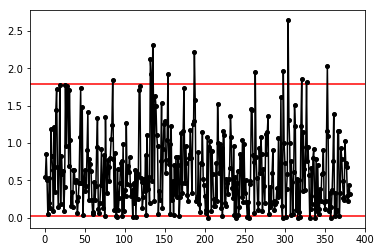

In [7]:
plt.axhline(y=lcl, color='r', linestyle='-')
plt.axhline(y=ucl, color='r', linestyle='-')
plt.plot(sampleNum, difference, marker = 'o')
plt.show()

## Look for Outliers 

Find the points above the upper control limit, and print out the corresponding comments

In [8]:
aboveUpper = np.array(difference)[np.array(difference)>ucl]
print ("Number of points above UCL:",np.size(aboveUpper))

aboveUpperIndex = np.where(difference > ucl)

for x in aboveUpperIndex:
    print(comment[x])

Number of points above UCL: 12
84                                          not finished
131                                                  NaN
132                                                  NaN
134                                                  NaN
153    Used an old cart, so many items were already p...
186                Throughout was talking to other staff
262                                                  NaN
297                                         1 phone call
303                                                  NaN
320                                                  NaN
326                                        2 phone calls
352                                                  NaN
Name: Comments, dtype: object


Find the points below the lower control limit, and print out the corresponding comments

In [9]:
belowLower = np.array(difference)[np.array(difference)<lcl]
print ("Number of points below LCL:",np.size(belowLower))

belowLowerIndex = np.where(difference < lcl)

for y in belowLowerIndex:
    print(comment[y])

Number of points below LCL: 16
89                                                   NaN
109                                                  NaN
113                                                  NaN
203                                                  NaN
221                                                  NaN
238                                                  NaN
252           GOR-2018-8036\rGOR-2018-8003 done together
254                                                  NaN
296    Was supposed to be picked by the afternoon shi...
300    Interruption during disposable picking to clar...
315                                                  NaN
318                                                  NaN
330                            picked together with 8334
337                              done together with 8194
356                                                  NaN
367       1 phone call during disposable picking phase. 
Name: Comments, dtype: object


## Merge the two to create one outlier array

In [10]:
outliers = aboveUpperIndex
outliers = np.append(outliers,belowLowerIndex)
print(outliers)

[ 84 131 132 134 153 186 262 297 303 320 326 352  89 109 113 203 221 238
 252 254 296 300 315 318 330 337 356 367]


In [11]:
outliers = sorted(outliers, key = int)
print(outliers)

[84, 89, 109, 113, 131, 132, 134, 153, 186, 203, 221, 238, 252, 254, 262, 296, 297, 300, 303, 315, 318, 320, 326, 330, 337, 352, 356, 367]


## Loop through outliers, remove and recalculate accordingly until all outliers are removed 

In [12]:
pickTimes = pd.Series.tolist(pickTimes)
count = 0

while outliers:
    #look at the points at the index and at index+1
    v1 = np.abs(pickTimes[int(outliers[0])]-pickTimes[int(outliers[0])+2])
    v2 = (np.abs(pickTimes[int(outliers[0])-1]-pickTimes[int(outliers[0])+1]))
    
    #find the one that makes difference larger, and remove
    if v1 < v2:
        del pickTimes[outliers[0]+1]
    else:
        del pickTimes[outliers[0]]
        
 
    #recalculate everything, including the index for outliers 
    difference = calcDiff()
    coordinates = zip(sampleNum, difference)
    sd = (np.mean(difference))/d2
    lcl = sd*wl
    ucl = sd*wu
    aboveUpperIndex = np.where(difference > ucl)
    belowLowerIndex = np.where(difference < lcl)
    outliers = aboveUpperIndex
    outliers = np.append(outliers,belowLowerIndex)
    outliers = sorted(outliers, key = int)
    
    count +=1


## Check the new chart

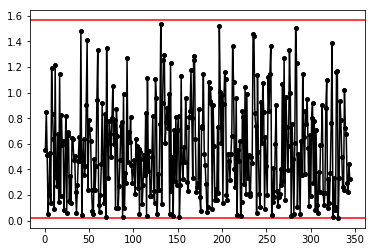

In [13]:
sampleNum = []

for y in range (1, (np.size(pickTimes))):
    sampleNum.append(y)

plt.axhline(y=lcl, color='r', linestyle='-')
plt.axhline(y=ucl, color='r', linestyle='-')
plt.plot(sampleNum, difference, marker = 'o')
plt.show()

Make sure there are no more outliers

The count represents the number of times the while loop looped, which is the number of points that were removed from the original data.

In [14]:
print(outliers)
print(count)

[]
37
